# Introduction to hypothesis testing
> A Summary of lecture "Statistical Thinking in Python (Part 2)", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Data_Science, Statistics]
- image: images/frog-swarmplot.png

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

## Formulating and simulating a hypothesis
- Hypothesis testing
    - Assesment of how reasonable the observed data are assuming a hypothesis is true
- Null hypothesis ($H_0$)
    - Another name for the hypothesis you are testing
- Permutation
    - Random reordering of entries in an array

### Generating a permutation sample
Permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively ```n1``` and ```n2``` entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first ```n1``` entries as the permutation sample of the first array and the last ```n2``` entries as the permutation sample of the second array.

In [3]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

### Visualizing permutation sampling
To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

In [4]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

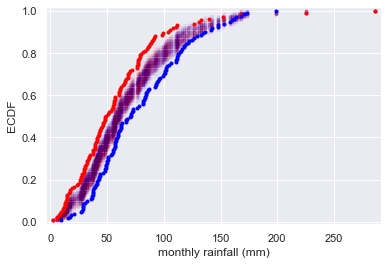

In [5]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)
    
    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    
    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)
    
# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')

## Test statistics and p-values
- Test Statistics
    - A single number that can be computed from observed data and from data you simulate under the null hypothesis
    - It serves as a basis of comparison between the two
- p-value
    - The probability of obtaining a value of your test statistics that is at least as extreme as what was observed, under the assumption the null hypothesis is true
    - **NOT** the probability that the null hypothesis is true
- Statistical significance
    - Determined by the smallness of a p-value
- Null Hypothesis Significance Testing (NHST)
    

### Generating permutation replicates
A permutation replicate is a single value of a statistic computed from a permutation sample.

In [6]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        
        # Compute the test statistics
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

### Look before you leap: EDA before hypothesis testing
Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, ```df```, where column ```ID``` is the identity of the frog and column ```impact_force``` is the impact force in Newtons (N).


In [7]:
df = pd.read_csv('./dataset/frog_tongue.csv', skiprows=14)
df.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


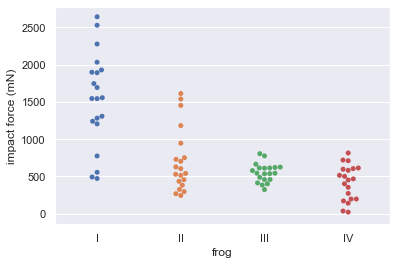

In [8]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact force (mN)', data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (mN)')
plt.savefig('../images/frog-swarmplot.png')

### Permutation test on frog data
The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays ```force_a``` and ```force_b```.

In [19]:
force_a = np.array(df[df['ID'] == 'II']['impact force (mN)'])
force_b = np.array(df[df['ID'] == 'IV']['impact force (mN)'])

In [23]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) -  np.mean(data_2)
    
    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0049


## Bootstrap hypothesis tests
- Pipeline for hypothesis testing
    - Clearly state the null hypothesis
    - Define your test statistics
    - Generate many sets of simulated data assuming the null hypothesis is true
    - Compute the test statistics for each simulated data set
    - The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data
- One sample test
    - Compare one set of data to a single number
- Two sample test
    - Compare two sets of data

### A one-sample bootstrap hypothesis test
Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [25]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

In [29]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 550

# Take bootstrap replicates of Frog B`s translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0053


### A two-sample bootstrap hypothesis test for difference of means
We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [31]:
forces_concat = np.concatenate((force_a, force_b))

In [37]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / 10000
print('p-value =', p)

p-value = 0.0036


## A/B testing
- Used by organizations to see if a strategy change gives a better result
- Null hypothesis of an A/B test
    - The test statistics is impervious to the change

### The vote for the Civil Rights Act in 1964
The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [39]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


### A time-on-website analog
It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that actually is a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays ```nht_dead``` and ```nht_live```, where "nht" is meant to stand for "no-hitter time."

In [40]:
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [42]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / 10000
print('p-val =', p)

p-val = 0.0002


## Test of correlation
- Hypothesis test of correlation
    - Posit null hypothesis: the two variables are completely uncorrelated
    - Simulate data assumning null hypothesis is true
    - Use Pearson correlation, $\rho$, as test statistics
    - Compute p-value as fraction of replicates that have $\rho$ as least as large as observed

### Hypothesis test on Pearson correlation
The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [43]:
df = pd.read_csv('./dataset/female_literacy_fertility.csv')
fertility = np.array(df['fertility'])
illiteracy = np.array(100 - df['female literacy'])

In [44]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays
    
    Args:
        x: arrays
        y: arrays
        
    returns:
        r: int
    """
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    
    # Return entry[0, 1]
    return corr_mat[0, 1]

In [46]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurements: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)
    
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)
    
# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / 10000
print('p-val =', p)

p-val = 0.0


## Do neonicotinoid insecticides have unintended consequences?
As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. ([Proc. Roy. Soc. B, 2016](http://dx.doi.org/10.1098/rspb.2016.0506)) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

In [50]:
control = np.array([ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174,
        6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148,
        6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      ,
        4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   ,
        6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158,
        6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172,
        3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 ,
        3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892,
        4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     ,
        0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 ,
        0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668,
        2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 ,
        2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294,
        2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478,
        3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232,
        8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282,
        3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958,
        6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628,
        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,
        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,
        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,
        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,
        3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666,
        0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      ,
        0.065   ])

treated = np.array([1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966,
       3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538,
       2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836,
       2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354,
       3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 ,
       2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658,
       0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964,
       2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 ,
       4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602,
       2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 ,
       1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804,
       3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046,
       2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962,
       2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      ,
       3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696])

Text(0, 0.5, 'ECDF')

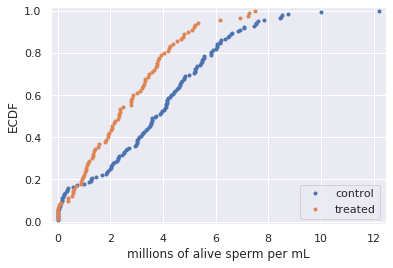

In [51]:
# Compute x, y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
_ = plt.plot(x_control, y_control, marker='.', linestyle='none')
_ = plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')

### Bootstrap hypothesis test on bee sperm counts
Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

In [56]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted, np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0001
